In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data

data = pd.read_csv('train.csv')
data.set_index(data['Id'],inplace = True)
data = data.iloc[:,1:]

display(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


1.Understand missing Values, write a function that will print out the percentage of each columns missing values for the whole dataset(compared with the rows of the whole dataset)

In [3]:
# problem 1

def percantageCounter(df: pd.DataFrame): 
    
    def __missingValues(series: pd.Series):
        all_nulls = series.isnull().sum()
        percantage = (all_nulls / series.shape[0]) * 100
        return round(percantage, 2)
    
    def __dfMaker(df: pd.DataFrame):
        all_nulls = df.isnull().sum()
        info_dict = {}
        for column in df.columns:
            value = __missingValues(df[column])
            if value == 0:
                continue
            else:
                info_dict[column] = value
            
        perc_series = pd.Series(info_dict)
        result_df = pd.concat([all_nulls, perc_series], axis = 1, join = 'inner')
        result_df.rename(columns = {0:'all_nulls', 1:'percantage'}, inplace = True)
        return result_df
    
    result_df = __dfMaker(df = df)
    result_df.sort_values(by = 'all_nulls', ascending = False, inplace = True)
    return result_df
        
display(percantageCounter(data))


,all_nulls,percantage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


2.Filter out all The Numerical Variables understand the correlation between numerical columns

Text(0.5, 1.0, 'Correlation Matrix')

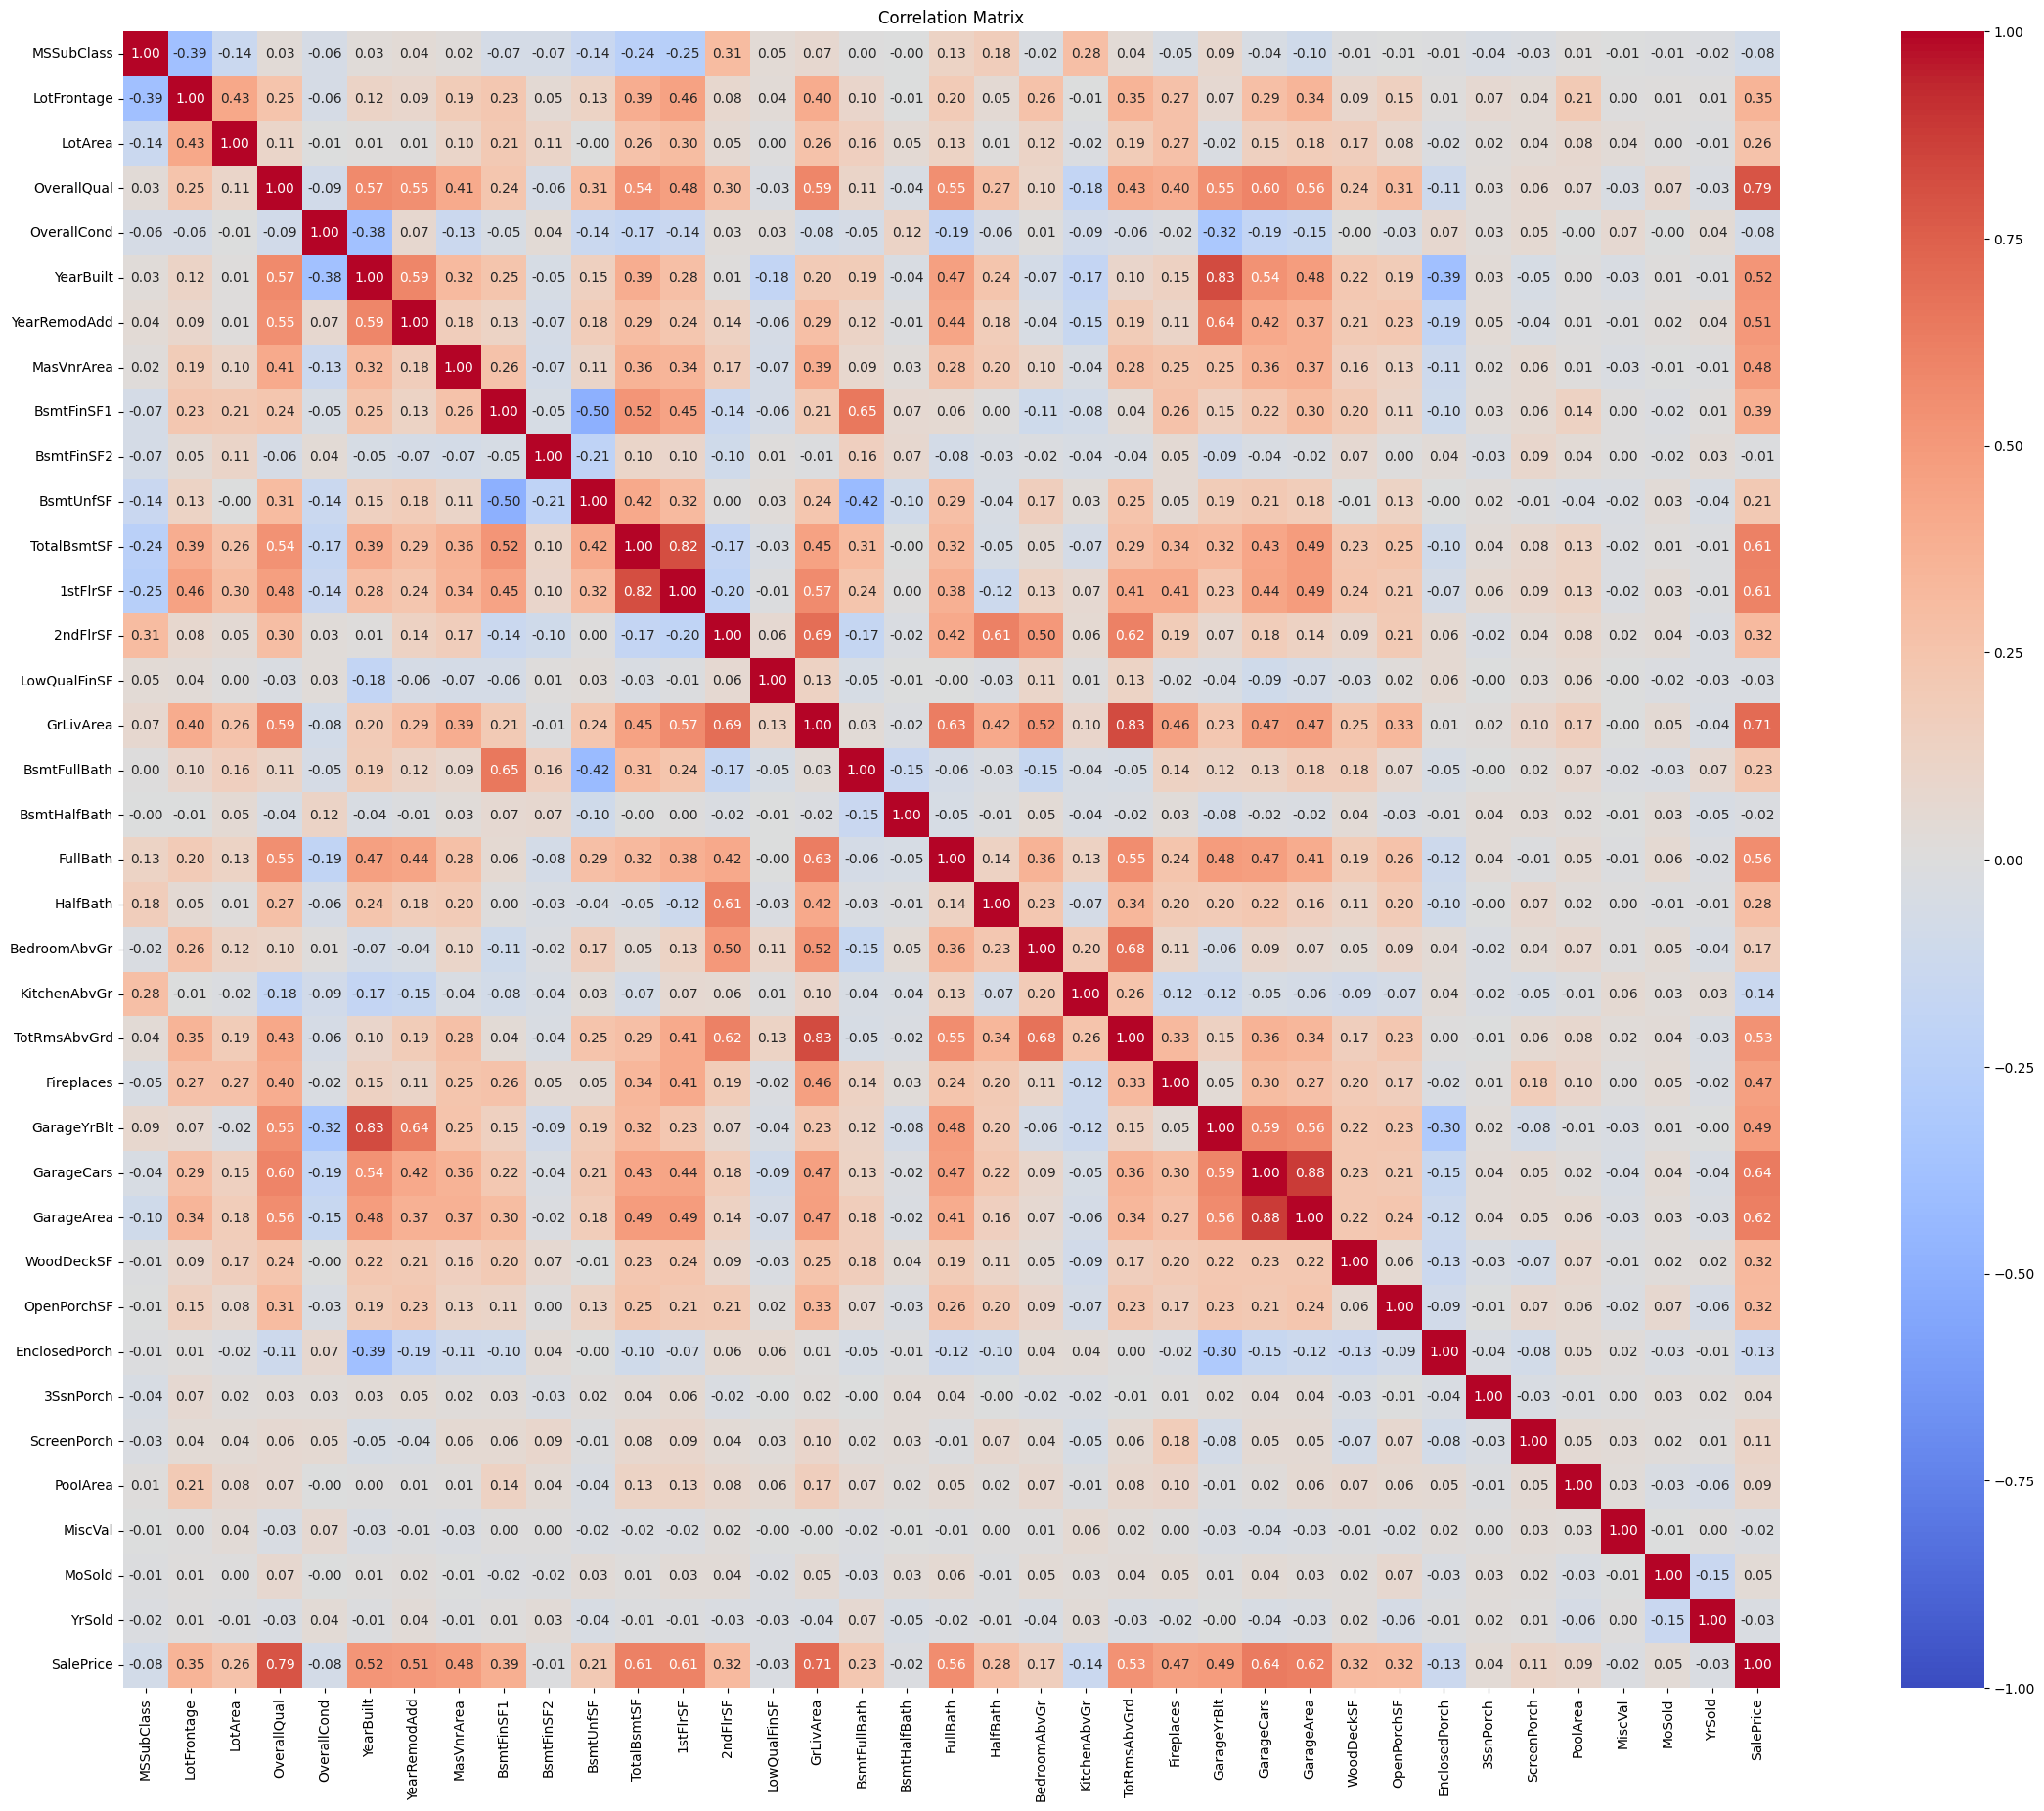

In [4]:
# problem 2

def numericVariables(df: pd.DataFrame):
    num_df = df.select_dtypes(include = np.number)
    return num_df

num_df = numericVariables(data)
corr_data = num_df.corr()
plt.figure(figsize = (32,22))
kwargs = dict(vmin = -1, vmax = 1, fmt = '.2f', annot = True, cbar = True, cmap = 'coolwarm', square = True)
corr_matrix = sns.heatmap(corr_data, **kwargs);
corr_matrix.set_title('Correlation Matrix')


3.Distribution of the Numerical Variables you want to explore


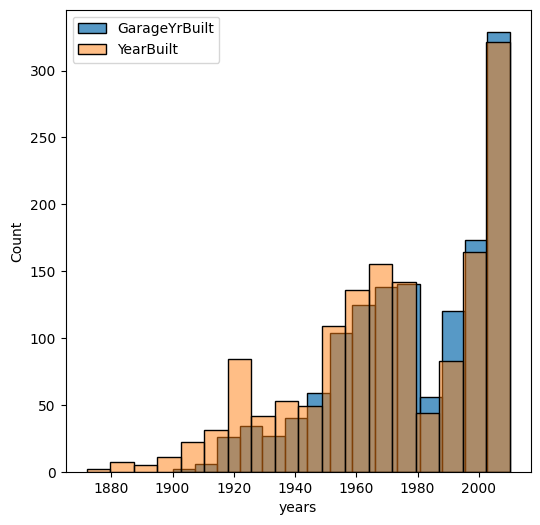

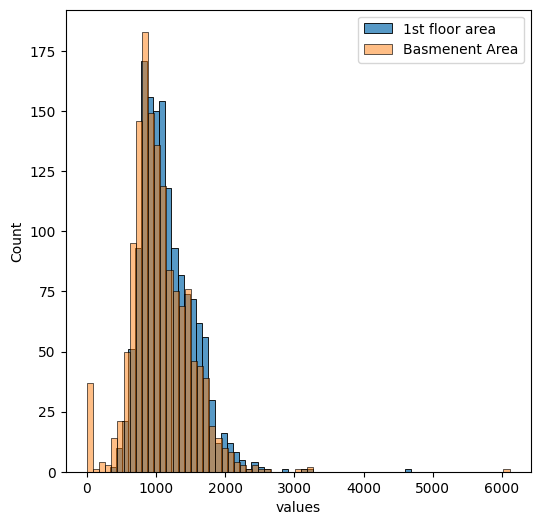

In [67]:
# problem 3

def garageAndBuildingDist():
    plt.figure(figsize=(6,6))
    sns.histplot(data['GarageYrBlt'], label = 'GarageYrBuilt')
    sns.histplot(data['YearBuilt'], label = 'YearBuilt', alpha = 0.5)
    plt.xlabel('years')
    plt.legend();

garageAndBuildingDist()

def firstFloorAndBasementDist():
    plt.figure(figsize=(6,6))
    sns.histplot(data['1stFlrSF'], label = '1st floor area')
    sns.histplot(data['TotalBsmtSF'], label = 'Basmenent Area', alpha = 0.5)
    plt.xlabel('values')
    plt.legend();

firstFloorAndBasementDist()


4. Categorical Variables with the relationship of other numeric variables with seaborn's pairplot

c:\Users\user\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


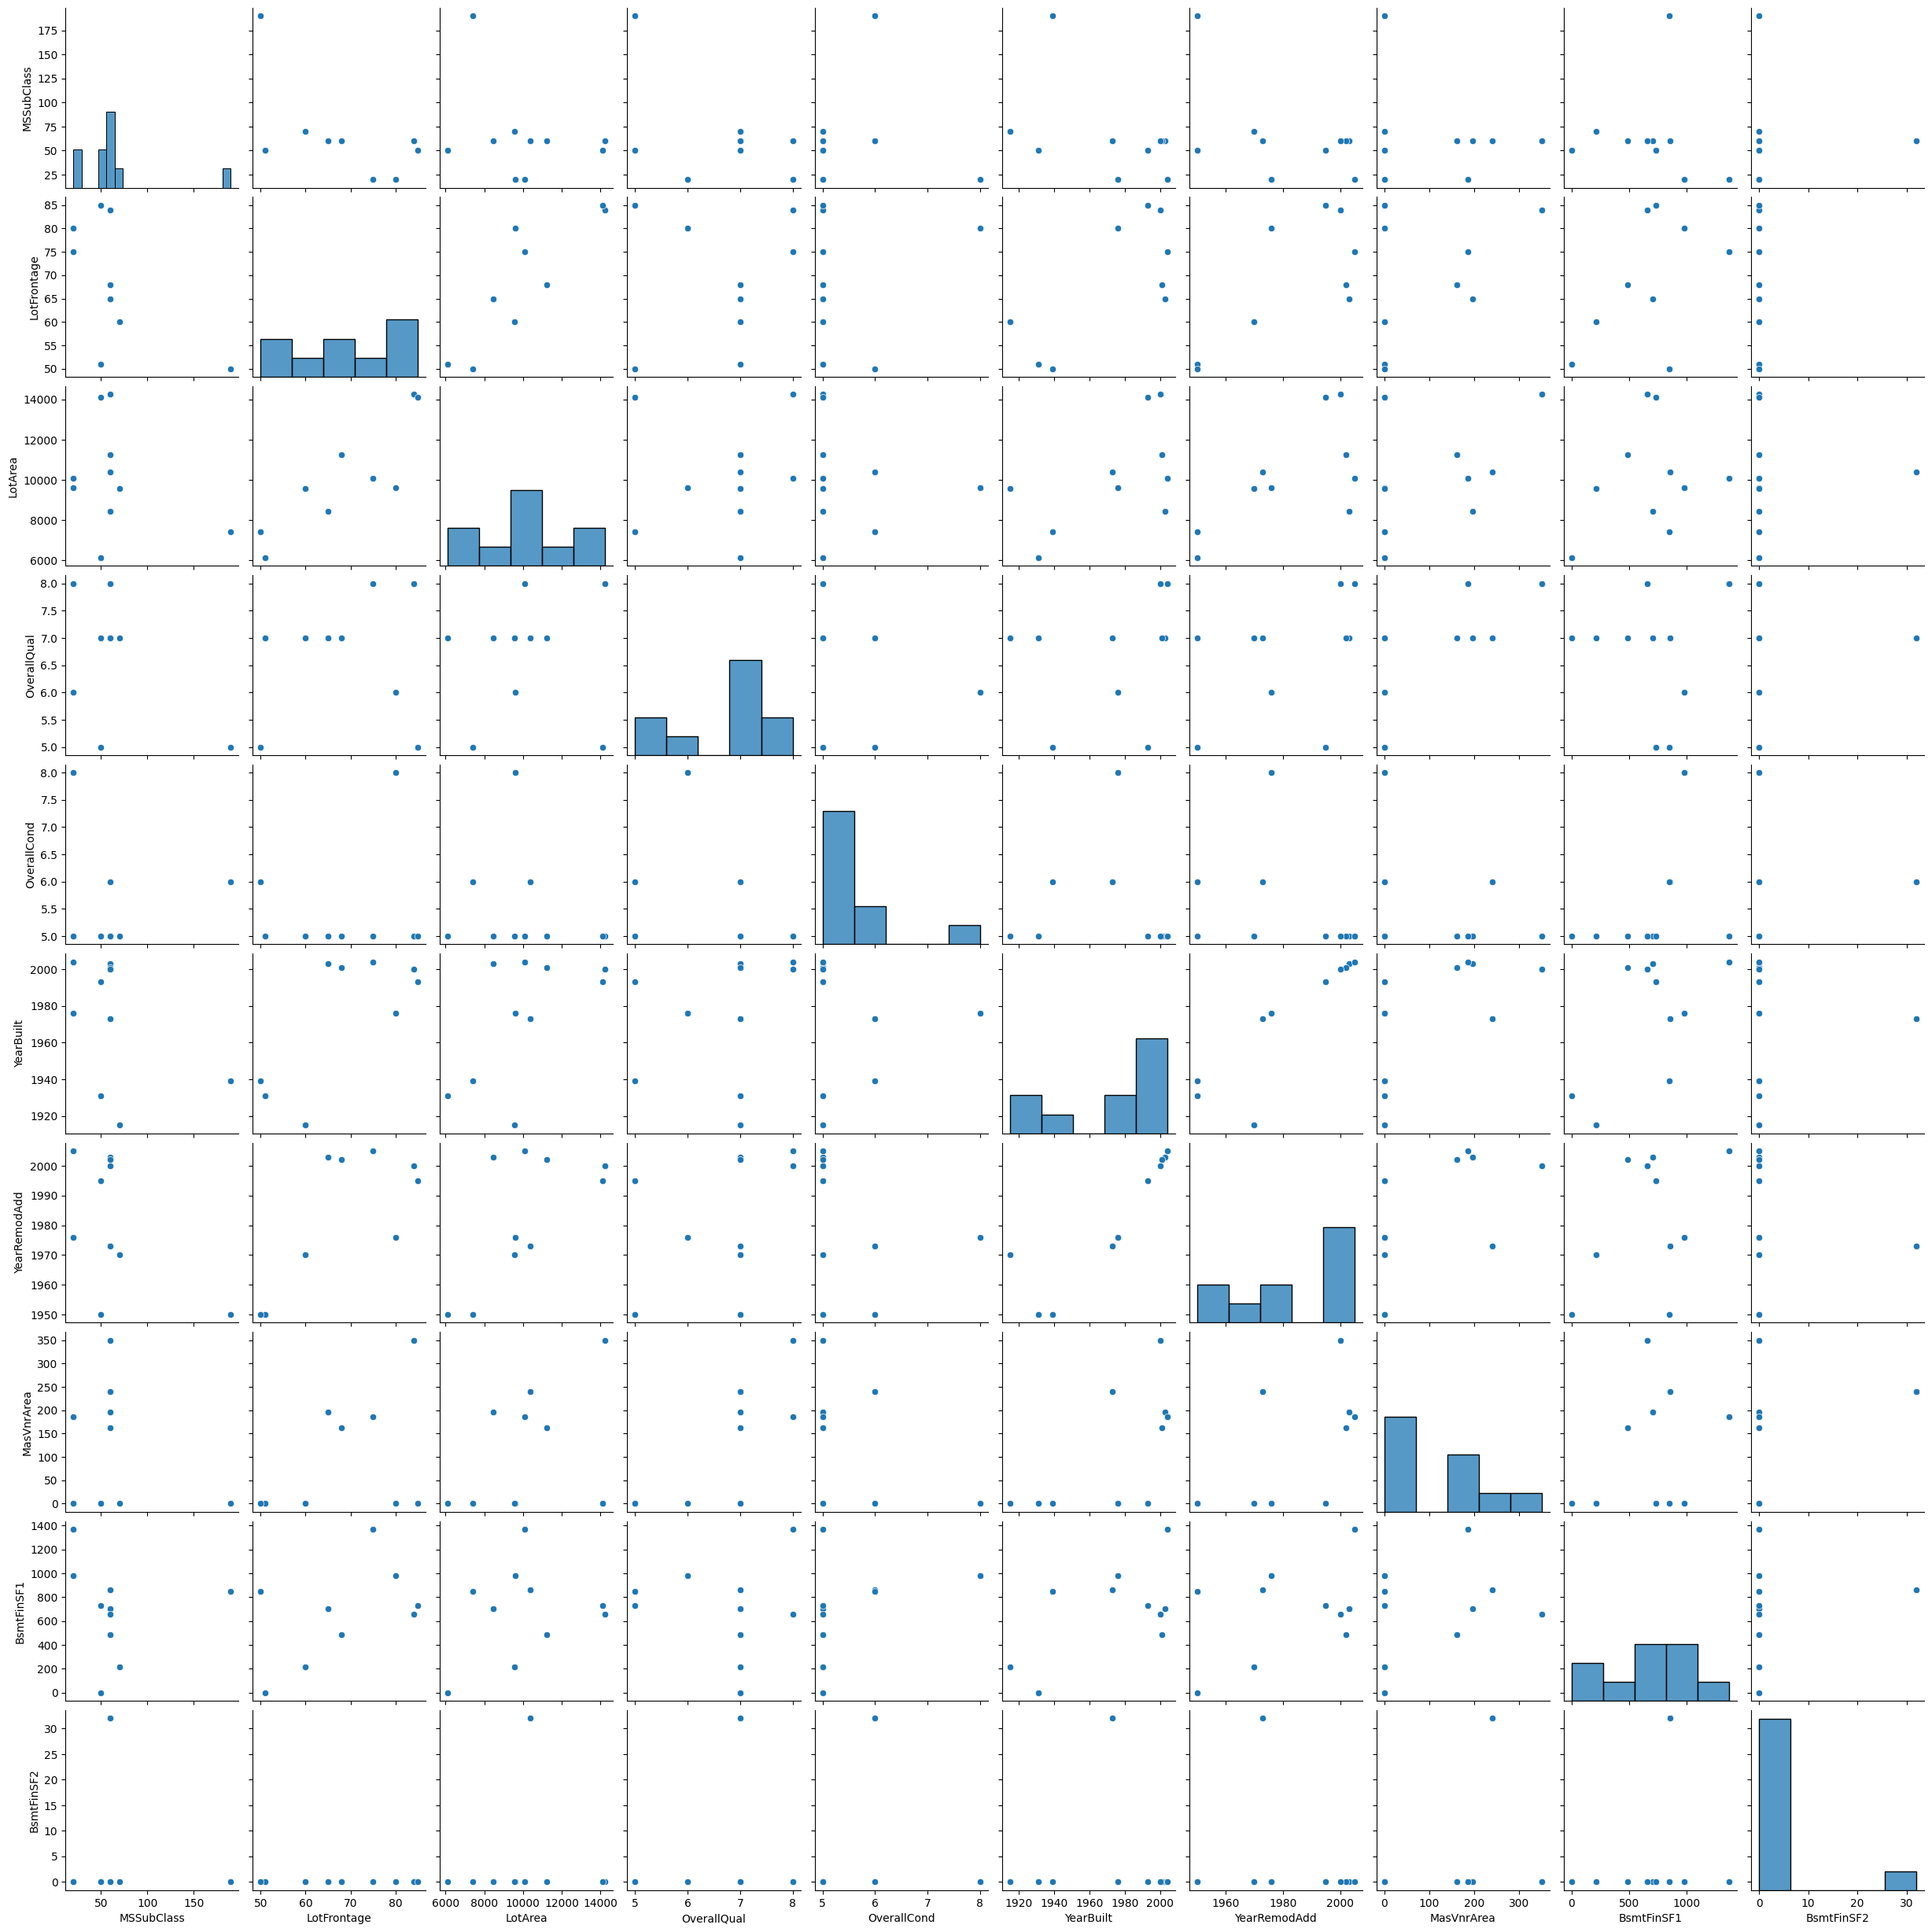

In [69]:
# problem 4

cat_df = data.select_dtypes(include = object)
sns.pairplot(num_df.iloc[:10, :10]);

5.Outliers (use boxplot,or numpy precentiles function to find out)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


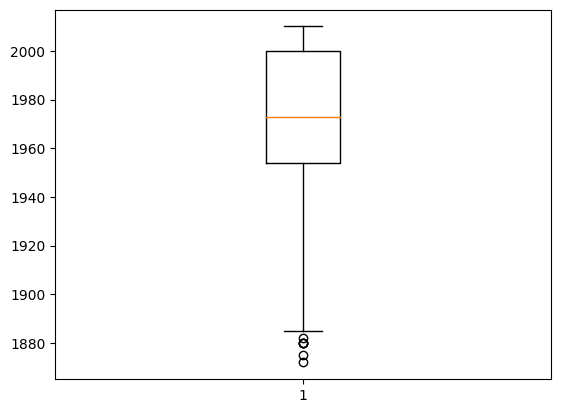

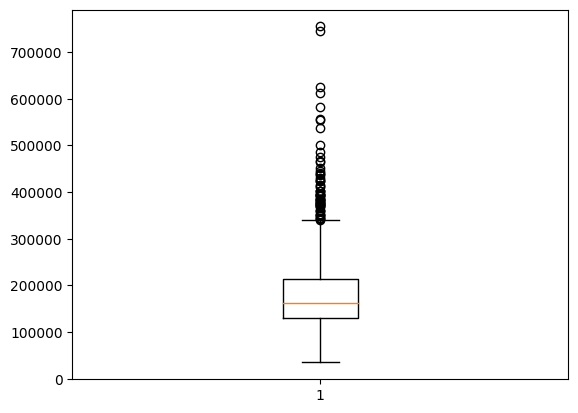

In [6]:
# problem 5

display(num_df.describe())
plt.boxplot(num_df['YearBuilt']);
plt.show()
plt.boxplot(num_df['SalePrice']);

6.Relationship between independent(all columns except SalePrice) and dependent feature(SalePrice)

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378
3SsnPorch,0.044584


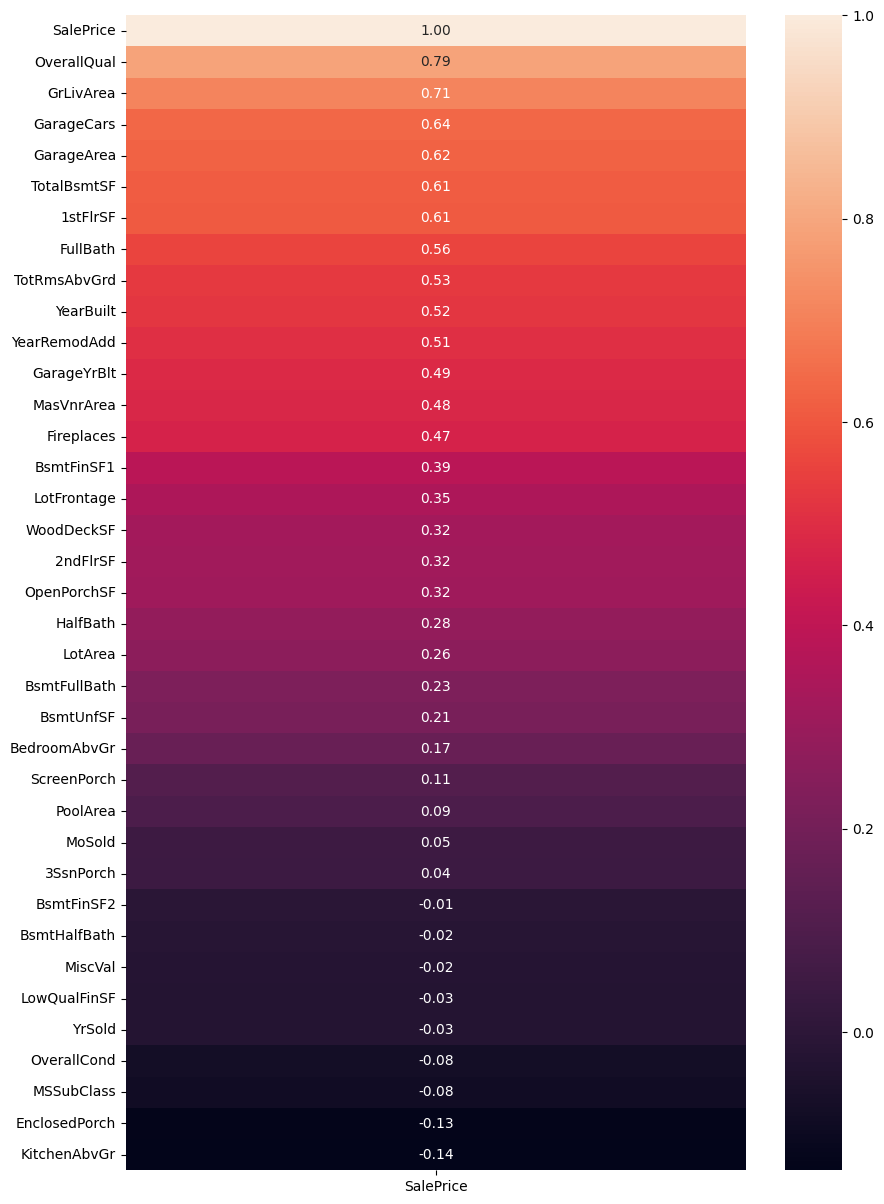

In [7]:
# problem 6

plt.figure(figsize = (10,15))
sns.heatmap(num_df.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), annot = True, fmt='.2f')

def salePriceCorr(df: pd.DataFrame):
    sale_corr = df.corr()[['SalePrice']]
    sale_corr.sort_values(ascending = True, by = 'SalePrice', inplace = True)
    return sale_corr
    
display(salePriceCorr(num_df))

7.Find out how the median SalesPrice has been changed over the YrSold. Hint: You need to use pandas groupby. Explain the results.

In [8]:
# problem 7

median_data = num_df[['SalePrice', 'YrSold']]
grouped_data = median_data.groupby(by = 'YrSold').aggregate(np.median)
display(grouped_data)

,SalePrice
YrSold,
2006,163995.0
2007,167000.0
2008,164000.0
2009,162000.0
2010,155000.0


8.Numerical variables are usually of 2 type They are continous variables and Discrete Variables. Find out discrete varibales and print the discrete variables dataset's first 6 rows.

In [9]:
# problem 8

discrete_columns = [column for column in num_df.columns if num_df[column].unique().sum() < 25]
display(num_df.loc[:6, discrete_columns])

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageCars
Id,,,,,,,
1,1,0,2,1,1,0,2
2,0,1,2,0,1,1,2
3,1,0,2,1,1,1,2
4,1,0,1,0,1,1,3
5,1,0,2,1,1,1,3
6,1,0,1,1,1,0,2


9.Find out the variables that are continuous. Find out the distributions of all continuous variables. Save them in a folder named distributions using plt.savefig(). Use loops to do so.

In [12]:
# problem 9

continoius_variables =  [column for column in num_df.columns if num_df[column].unique().sum() >= 25]

def distOfCont(df: pd.DataFrame):
    cont_df = df.loc[:, continoius_variables]
    
    for i, column in enumerate(cont_df.columns, start = 1):
        plt.figure(figsize = (8,8))
        sns.histplot(cont_df[column], label = column)
        plt.legend();
        plt.title(f'{column} distribution')
        plt.savefig(f'{column} distribution - {i}')
        plt.close()
    
distOfCont(num_df)
    
    

9.Apply logarithmic function on all continous variables and on SalesPrice and plot them in another folder named logarithms.

In [13]:
# problem 9

def logPlots(df: pd.DataFrame):
    cont_df = df.loc[:, continoius_variables].iloc[:, :-1]
    sale_series = df['SalePrice']
    log_cont_df = cont_df.apply(np.log)
    log_sales = sale_series.apply(np.log)
    
    for i, column in enumerate(log_cont_df.columns, start = 1):
        plt.figure(figsize=(6,6))
        x = log_cont_df[column]
        y = log_sales
        sns.scatterplot(x = x, y = y)
        plt.title(f'{column}/SalePrice')
        plt.savefig(f'{column}_SalePrices log distribution - {i}')
        plt.close()
    
logPlots(num_df)

10.Apply boxplots on all continous variables plot them in another folder named outliers.

In [14]:
# problem 10

def boxPlots(df: pd.DataFrame):
    cont_df =  df.loc[:, continoius_variables]
    
    for i, column in enumerate(cont_df.columns, start = 1):
        plt.boxplot(cont_df[column])
        plt.title(f'{column} boxplot')
        plt.savefig(f'{column} boxplot - {i}')
        plt.close()

boxPlots(num_df)

11.Print out the categorical variables and how many categories are there for each case.

In [27]:
# problem 11

categorical_variables = [column for column in data.columns if np.dtype(data[column]) == 'O']
cat_df = data.loc[:, categorical_variables]

for column in cat_df.columns:
    print(f'{column} categories are {len(cat_df[column].unique())}')

MSZoning categories are 5
Street categories are 2
Alley categories are 3
LotShape categories are 4
LandContour categories are 4
Utilities categories are 2
LotConfig categories are 5
LandSlope categories are 3
Neighborhood categories are 25
Condition1 categories are 9
Condition2 categories are 8
BldgType categories are 5
HouseStyle categories are 8
RoofStyle categories are 6
RoofMatl categories are 8
Exterior1st categories are 15
Exterior2nd categories are 16
MasVnrType categories are 4
ExterQual categories are 4
ExterCond categories are 5
Foundation categories are 6
BsmtQual categories are 5
BsmtCond categories are 5
BsmtExposure categories are 5
BsmtFinType1 categories are 7
BsmtFinType2 categories are 7
Heating categories are 6
HeatingQC categories are 5
CentralAir categories are 2
Electrical categories are 6
KitchenQual categories are 4
Functional categories are 7
FireplaceQu categories are 6
GarageType categories are 7
GarageFinish categories are 4
GarageQual categories are 6
Garag

12.Find out the median of each category and plot all the categorical variables with bar plot. Save the pictures in barplots folder.

In [63]:
# problem 12

def catBarPlots(df: pd.DataFrame):
    cat_df = df.loc[:, categorical_variables]
    
    for i, column in enumerate(cat_df.columns, start = 1):
        plt.figure(figsize = (8,8))
        sns.countplot(data = cat_df, x = column)
        plt.title(f'{column} barplot')
        plt.savefig(f'{column} barplot - {i}')
        plt.close()

catBarPlots(data)
        